In [7]:
# Create the final SUMS catalog
# - I checked for duplicates that we may have introduced by self-matching the step 4 catalogs in topcat. 
# - There are some very close sources (~0.1 arcsec) but they do have different MCPS photometry.
# - There were 4 of these in the SMC and 3 in the LMC.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

# Set dir depending on machine 
import os
data_dir = os.getenv("DATADIR")
df = pd.read_csv(data_dir + '0_SUMS_Catalogs/FinalCatalogs/SUMS_UV_Catalog.csv')
cf = pd.read_csv(data_dir + '0_SUMS_Catalogs/FinalCatalogs/SUMS_UV_Candidate_Catalog.csv')

# Sources with only one observation
n_obs = ['UVW2_nobs',	'UVM2_nobs',	'UVW1_nobs']
# Per filter
for label in n_obs:
    print(df[df[label] == 1].shape[0],' or ',df[df[label] == 1].shape[0]/df.shape[0]*100, 'percent sources with only 1 observation in', label)
# Any filter
print('Any filter: ', df[(df[n_obs[0]] == 1) | (df[n_obs[1]] == 1) | (df[n_obs[2]] == 1)].shape[0])
print('Any filter: ', df[(df[n_obs[0]] == 1) | (df[n_obs[1]] == 1) | (df[n_obs[2]] == 1)].shape[0] / df.shape[0] * 100,' percent')
# All filters
print('All filters: ', df[(df[n_obs[0]] == 1) & (df[n_obs[1]] == 1) & (df[n_obs[2]] == 1)].shape[0])
print('All filters: ', df[(df[n_obs[0]] == 1) & (df[n_obs[1]] == 1) & (df[n_obs[2]] == 1)].shape[0] / df.shape[0] * 100,' percent')

for label in ['UVW1_dist_neighbor', 'UVM2_dist_neighbor', 'UVW2_dist_neighbor']:
    print(label, df[label].min(), df[label].max())
    print(label, df[label].mean(), df[label].std())
    print(label, df[label].median())
    print(f"Sources with neighbor within 2AS: {df[df[label] < 2].shape[0]/df.shape[0] * 100:.2f}%")

158527  or  21.572144150862265 percent sources with only 1 observation in UVW2_nobs
142330  or  19.368077847888536 percent sources with only 1 observation in UVM2_nobs
140652  or  19.13973783082427 percent sources with only 1 observation in UVW1_nobs
Any filter:  335413
Any filter:  45.64255670058201  percent
All filters:  14979
All filters:  2.038322476523027  percent
UVW1_dist_neighbor 0.05 27.85
UVW1_dist_neighbor 3.5880038361909032 2.321959046365188
UVW1_dist_neighbor 3.0
Sources with neighbor within 2AS: 12.08%
UVM2_dist_neighbor 0.14 28.17
UVM2_dist_neighbor 3.5768154617314716 2.090437825313044
UVM2_dist_neighbor 3.05
Sources with neighbor within 2AS: 10.43%
UVW2_dist_neighbor 0.05 27.79
UVW2_dist_neighbor 3.555090779834945 2.1681215324286667
UVW2_dist_neighbor 3.01
Sources with neighbor within 2AS: 13.42%


In [3]:
# Full catalog - If we make nans be zero what is the average?
for label in n_obs:
    uvf_n_obs = df[label].copy()
    uvf_n_obs[np.isnan(uvf_n_obs)] = 0
    print(label, np.mean(uvf_n_obs))

UVW2_nobs 3.0969356443121154
UVM2_nobs 2.2411354948977302
UVW1_nobs 2.7743230426103156


In [ ]:
# Full catalog -  Double check that I don't see anything surprising"
colums = df.columns
col = colums[15]
df[col].describe()


count    663422.000000
mean         18.155884
std           1.278697
min           9.050000
25%          17.590000
50%          18.372000
75%          19.011000
max          22.265000
Name: I, dtype: float64

Text(0.5, 1.0, 'Full Catalog')

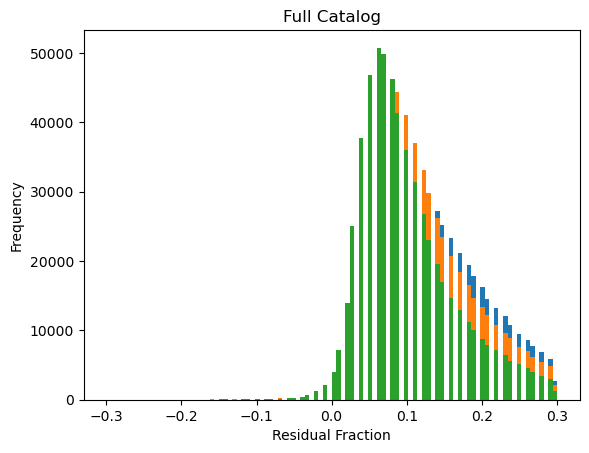

In [5]:
df.UVM2_resid_frac.plot.hist(bins=100)
df.UVW2_resid_frac.plot.hist(bins=100)
df.UVW1_resid_frac.plot.hist(bins=100)
plt.xlabel('Residual Fraction')
plt.title('Full Catalog')

,UVM2_err,UVW2_err,UVW1_err
count,525332.000000,647945.000000,588829.000000
mean,0.145514,0.142570,0.142079
std,0.098003,0.098916,0.097857
min,0.010000,0.010000,0.010000
25%,0.060000,0.060000,0.060000
50%,0.120000,0.120000,0.120000
75%,0.210000,0.210000,0.210000
max,0.360000,0.360000,0.360000


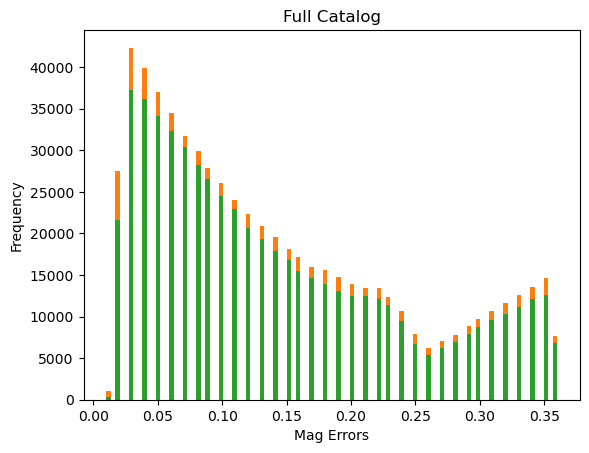

In [6]:
df.UVM2_err.plot.hist(bins=100)
df.UVW2_err.plot.hist(bins=100)
df.UVW1_err.plot.hist(bins=100)
plt.xlabel('Mag Errors')
plt.title('Full Catalog')
df[['UVM2_err', 'UVW2_err', 'UVW1_err']].describe()

In [7]:
print('N Sources: ', df.shape[0])
print('N Sources LMC: ', df[df.RA>30].shape[0])
print('N Sources SMC: ', df[df.RA<30].shape[0])
print('N Blue Sources: ', cf.shape[0])
print('N Blue Sources LMC: ', cf[cf.RA>30].shape[0])
print('N Blue Sources SMC: ', cf[cf.RA<30].shape[0])

N Sources:  734869
N Sources LMC:  471507
N Sources SMC:  263362
N Blue Sources:  829
N Blue Sources LMC:  528
N Blue Sources SMC:  301


In [8]:
# Import combined color catalog 
comb5 = pd.read_csv(data_dir + '0_SUMS_Catalogs/CandidateCatalog/0_combined_colors.csv')
color_errs = list(comb5.keys()[81:-30])
meds = []
for err in color_errs:
    meds.append(comb5[err].median())
    print(f"{err}: Min: {comb5[err].min():.3f}, Max: {comb5[err].max():.3f}, Mean: {comb5[err].mean():.3f}, Median: {comb5[err].median():.3f}")

uvw2 - b err: Min: 0.027, Max: 1.556, Mean: 0.274, Median: 0.269
uvw2 - v err: Min: 0.031, Max: 1.556, Mean: 0.282, Median: 0.277
uvw2 - i err: Min: 0.031, Max: 1.557, Mean: 0.281, Median: 0.277
uvw1 - b err: Min: 0.026, Max: 1.557, Mean: 0.276, Median: 0.274
uvw1 - v err: Min: 0.032, Max: 1.559, Mean: 0.284, Median: 0.282
uvw1 - i err: Min: 0.032, Max: 1.560, Mean: 0.281, Median: 0.279
uvm2 - b err: Min: 0.028, Max: 1.336, Mean: 0.269, Median: 0.267
uvm2 - v err: Min: 0.034, Max: 1.347, Mean: 0.277, Median: 0.276
uvm2 - i err: Min: 0.031, Max: 1.337, Mean: 0.274, Median: 0.272


In [34]:
# Import combined color catalog 
step3 = pd.read_csv(data_dir + '0_SUMS_Catalogs/CandidateCatalog/3_stripped_star_candidates.csv')
step3 = step3[step3.galaxy=='smc']
meds = []
avgs = []
for err in color_errs:
    meds.append(step3[err].median())
    avgs.append(step3[err].mean())
    print(f"{err}: Min: {step3[err].min():.3f}, Max: {step3[err].max():.3f}, Mean: {step3[err].mean():.3f}, Median: {step3[err].median():.3f}")

uvw2 - b err: Min: 0.030, Max: 0.492, Mean: 0.156, Median: 0.141
uvw2 - v err: Min: 0.036, Max: 0.489, Mean: 0.165, Median: 0.151
uvw2 - i err: Min: 0.035, Max: 0.514, Mean: 0.178, Median: 0.164
uvw1 - b err: Min: 0.031, Max: 0.434, Mean: 0.172, Median: 0.171
uvw1 - v err: Min: 0.034, Max: 0.437, Mean: 0.180, Median: 0.169
uvw1 - i err: Min: 0.034, Max: 0.504, Mean: 0.192, Median: 0.187
uvm2 - b err: Min: 0.029, Max: 0.756, Mean: 0.164, Median: 0.157
uvm2 - v err: Min: 0.035, Max: 0.756, Mean: 0.171, Median: 0.161
uvm2 - i err: Min: 0.034, Max: 0.761, Mean: 0.184, Median: 0.177


In [35]:
np.median(meds),np.mean(meds)

(0.164159825607622, 0.16410397504067842)

In [36]:
np.median(avgs),np.mean(avgs)

(0.17245027454863662, 0.17361843821072362)